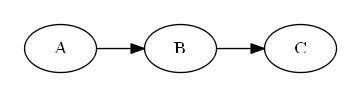

In [1]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

g1 = nx.DiGraph()
g1.add_edges_from([('A', 'B'), ('B', 'C')])
d1 = to_pydot(g1)
d1.set_rankdir('LR')
d1.set_margin(0.2)
Image(d1.create_png(), width=600)

#### 변수제거

In [4]:
from pgmpy.factors.discrete import TabularCPD

P_A = TabularCPD('A', 3, [[0.1], [0.6], [0.3]])
P_B_I_A = TabularCPD('B', 3, np.array([[0.6, 0.2, 0.1], [0.3, 0.5, 0.3], [0.1, 0.3, 0.6]]), evidence=['A'], evidence_card=[3])
P_C_I_B = TabularCPD('C', 3, np.array([[0.7, 0.1, 0.1], [0.2, 0.6, 0.1], [0.1, 0.3, 0.8]]), evidence=['B'], evidence_card=[3])

In [5]:
from pgmpy.models import BayesianModel

model = BayesianModel([('A', 'B'), ('B', 'C')])
model.add_cpds(P_A, P_B_I_A, P_C_I_B)
model.check_model()

True

In [6]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
print(infer.query(['C']))

Eliminating: B: 100%|██████████| 2/2 [00:00<00:00, 334.02it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.2260 |
+------+----------+
| C(1) |   0.3310 |
+------+----------+
| C(2) |   0.4430 |
+------+----------+


In [7]:
P_B = (P_B_I_A * P_A).marginalize(['A'], inplace=False)
P_C = (P_C_I_B * P_B).marginalize(['B'], inplace=False)
print(P_C)

+------+-------+
| C(0) | 0.226 |
+------+-------+
| C(1) | 0.331 |
+------+-------+
| C(2) | 0.443 |
+------+-------+


In [8]:
print(infer.query(['C'], evidence={'A': 2}))

Eliminating: B: 100%|██████████| 1/1 [00:00<00:00, 243.88it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.1600 |
+------+----------+
| C(1) |   0.2600 |
+------+----------+
| C(2) |   0.5800 |
+------+----------+


In [10]:
P_A2 = TabularCPD('A', 3, [[0], [0], [1]])
P_B = (P_B_I_A * P_A2).marginalize(['A'], inplace=False)
P_C = (P_C_I_B * P_B).marginalize(['B'], inplace=False)
print(P_C)

+------+------+
| C(0) | 0.16 |
+------+------+
| C(1) | 0.26 |
+------+------+
| C(2) | 0.58 |
+------+------+


In [11]:
print(infer.query(['A'], evidence={'B': 0, 'C': 2}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+


In [12]:
print(infer.query(['A'], evidence={'B': 0}))

Eliminating: C: 100%|██████████| 1/1 [00:00<00:00, 337.57it/s]

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+


In [13]:
print(P_B_I_A * P_A)

+------+----------------------+------+------+
| A    | A(0)                 | A(1) | A(2) |
+------+----------------------+------+------+
| B(0) | 0.06                 | 0.12 | 0.03 |
+------+----------------------+------+------+
| B(1) | 0.03                 | 0.3  | 0.09 |
+------+----------------------+------+------+
| B(2) | 0.010000000000000002 | 0.18 | 0.18 |
+------+----------------------+------+------+


In [14]:
print((P_B_I_A * P_A).to_factor().reduce([('B', 0)], inplace=False).normalize(inplace=False))

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+


#### 몬티 홀 문제

In [15]:
from pgmpy.factors.discrete import TabularCPD

P_C = TabularCPD('C', 3, [[0.33], [0.33], [0.33]])
print(P_C)

+------+------+
| C(0) | 0.33 |
+------+------+
| C(1) | 0.33 |
+------+------+
| C(2) | 0.33 |
+------+------+


In [16]:
P_P = TabularCPD('P', 3, [[0.33], [0.33], [0.33]])
print(P_P)

+------+------+
| P(0) | 0.33 |
+------+------+
| P(1) | 0.33 |
+------+------+
| P(2) | 0.33 |
+------+------+


In [17]:
P_H_I_CP = TabularCPD('H', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                               [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                               [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                      evidence=['C', 'P'], evidence_card=[3, 3])
print(P_H_I_CP)

+------+------+------+------+------+------+------+------+------+------+
| C    | C(0) | C(0) | C(0) | C(1) | C(1) | C(1) | C(2) | C(2) | C(2) |
+------+------+------+------+------+------+------+------+------+------+
| P    | P(0) | P(1) | P(2) | P(0) | P(1) | P(2) | P(0) | P(1) | P(2) |
+------+------+------+------+------+------+------+------+------+------+
| H(0) | 0.0  | 0.0  | 0.0  | 0.0  | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(1) | 0.5  | 0.0  | 1.0  | 0.0  | 0.0  | 0.0  | 1.0  | 0.0  | 0.5  |
+------+------+------+------+------+------+------+------+------+------+
| H(2) | 0.5  | 1.0  | 0.0  | 1.0  | 0.5  | 0.0  | 0.0  | 0.0  | 0.0  |
+------+------+------+------+------+------+------+------+------+------+


In [19]:
from pgmpy.models import BayesianModel

model_monty = BayesianModel([('C', 'H'), ('P', 'H')])
model_monty.add_cpds(P_C, P_P, P_H_I_CP)
model_monty.check_model()

True

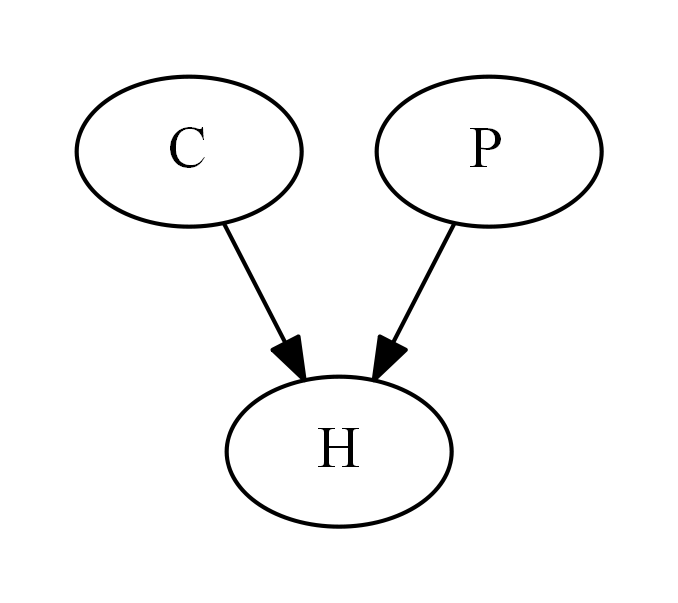

In [22]:
d_monty = to_pydot(model_monty)
d_monty.set_dpi(300)
d_monty.set_margin(0.2)
Image(d_monty.create_png(), width=400)

In [23]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model_monty)

In [27]:
print(infer.query(['H'], evidence={'P': 0}))

Eliminating: C: 100%|██████████| 1/1 [00:00<00:00, 252.46it/s]

+------+----------+
| H    |   phi(H) |
+======+==========+
| H(0) |   0.0000 |
+------+----------+
| H(1) |   0.5000 |
+------+----------+
| H(2) |   0.5000 |
+------+----------+


In [28]:
print(infer.query(['C'], evidence={'P': 0, 'H': 1}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3333 |
+------+----------+
| C(1) |   0.0000 |
+------+----------+
| C(2) |   0.6667 |
+------+----------+


In [31]:
print(infer.query(['C'], evidence={'P': 1, 'H': 2}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6667 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.0000 |
+------+----------+


#### 신뢰전파

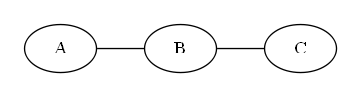

In [33]:
g = nx.Graph()
g.add_edges_from([('A', 'B'), ('B', 'C')])
d = to_pydot(g)
d.set_rankdir('LR')
d.set_margin(0.2)
Image(d.create_png(), width=600)

In [34]:
from pgmpy.inference import BeliefPropagation
infer = BeliefPropagation(model)
print(infer.query(['C']))

Eliminating: B: 100%|██████████| 1/1 [00:00<00:00, 501.53it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.2260 |
+------+----------+
| C(1) |   0.3310 |
+------+----------+
| C(2) |   0.4430 |
+------+----------+


In [35]:
print(infer.query(['C'], evidence={'A': 2}))

Eliminating: B: 100%|██████████| 1/1 [00:00<00:00, 359.38it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.1600 |
+------+----------+
| C(1) |   0.2600 |
+------+----------+
| C(2) |   0.5800 |
+------+----------+


In [37]:
print(infer.query(['A'], evidence={'B': 0, 'C': 2}))

0it [00:00, ?it/s]

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.2857 |
+------+----------+
| A(1) |   0.5714 |
+------+----------+
| A(2) |   0.1429 |
+------+----------+
